In [74]:
from Bio.Seq import reverse_complement
from Bio import SeqIO
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

In [77]:
indexes = ['TGGCTTCA',
           'CTAAGGTC',
           'CCGTGAGA',
           'GACTAGTA',
           'AGTGGTCA',
           'AGATCGCA',
           'AGCAGGAA',
           'CATCAAGT',
           'ATCCTGTA',
           'AGCCATGC',
           'GATAGACA']

sample_names = {
            "hybr1_S1":"FFPE_3ng_A_2",
            "hybr1_S2":"FFPE_3ng_A_3",
            "hybr1_S4":"FFPE_3ng_B_2",
            "hybr1_S5":"FFPE_3ng_C_1",
            "hybr4_S9":"FFPE_3ng_A_4",
            "hybr5_S11":"FFPE_3ng_C_2",
            "hybr2_S6":"FFPE_3ng_S",
            "hybr3_S7":"FFPE_100ng_S"}
#             "hybr4_S8":"FFPE_3ng_A_1",
#             "hybr5_S10":"FFPE_3ng_B_1",

### Read in all sample UMI fastqs and write to a summary file

In [78]:
for sample in sample_names.keys():
    seq_dct = {}
    if not os.path.isfile('../data/umi/{}.umi.txt'.format(sample)): 
        print(sample)
        with gzip.open("../data/umi/{}_L001_R3_001.fastq.gz".format(sample), "rt") as handle:
            for record in SeqIO.parse(handle, "fastq"):
                seq = str(record.seq)
                if 'N' not in seq:
                    if seq not in seq_dct.keys():
                        seq_dct[seq] = 1
                    else:
                        seq_dct[seq] += 1
            df = pd.DataFrame.from_dict(seq_dct,orient='index')
            df = df.rename(columns={0:'reads'})
            df['seq'] = df.index
            df = df.sort_values(by='reads',ascending=False)
            df.to_csv('../data/umi/{}.umi.txt'.format(sample),sep='\t')
            print('Writing to ../data/umi/{}.umi.txt'.format(sample))

hybr5_S11
Writing to ../data/umi/hybr5_S11.umi.txt
hybr2_S6
Writing to ../data/umi/hybr2_S6.umi.txt
hybr3_S7
Writing to ../data/umi/hybr3_S7.umi.txt


<BarContainer object of 1001 artists>

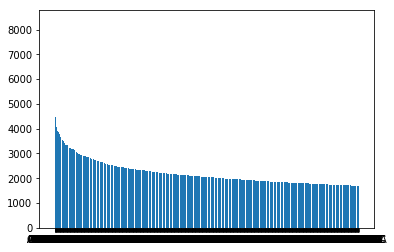

In [35]:
df_short=df.iloc[:1001]
plt.bar(df_short['seq'],df_short['reads'])

In [56]:
for i in indexes:
        print(i)
        try:
            df[i]
            print(i)
        except:
            try:
                df[reverse_complement(i)]
                print(reverse_complement(i))
            except:
                continue

TGGCTTCA
CTAAGGTC
CCGTGAGA
GACTAGTA
AGTGGTCA
AGATCGCA
AGCAGGAA
CATCAAGT
ATCCTGTA
AGCCATGC
GATAGACA
